# LogRatioEstimator_Ndim

First we need some imports.

In [1]:
%load_ext autoreload
%autoreload 2
import pylab as plt
import torch
import numpy as np

In [2]:
def logl(u):
    #return -0.5*(u[..., :]**2).sum(axis=-1)/0.1**2#-0.5*(u[..., 2:4]**2).sum(axis=-1)/0.1**2
    ret = (-0.5*(u[..., :]**2)/0.1**2).min(axis=-1).values
   # ret = (-0.5*(u[..., :]**2)/0.1**2).sum(axis=-1)
#    print(ret)
    return ret

In [3]:
def get_directions(B, D):
    t = torch.randn(B, D)
    l = (t**2).sum(axis=-1)**0.5
    n = t/l.unsqueeze(-1)
    return n

In [4]:
def get_slice_sample_points(B, S):
    hard_bounds = torch.tensor([-1., 1.]).unsqueeze(0).repeat((B,1))
    current_bounds = hard_bounds.clone()
    L = torch.empty((B, S))
    for i in range(S):
        x = torch.rand(B)*(current_bounds[:,1]-current_bounds[:,0])+current_bounds[:,0]
        L[:,i] = x
        current_bounds[x<0,0] = x[x<0]
        current_bounds[x>0,1] = x[x>0]
    return L

In [7]:
B = 1000
D = 100
print(0.3*D**0.5)
logl_th  = -5

X = torch.randn(B, D)*0.0

for i in range(1000):
#    print(i)
    N = get_directions(B, D)
    L = get_slice_sample_points(B, S = 20)*20
    dX = N.unsqueeze(-2)*L.unsqueeze(-1)
    pX = X.unsqueeze(-2) + dX # proposals
    plogl = logl(pX)
    accept_matrix = plogl > logl_th
    idx = torch.argmax(accept_matrix.int(), dim=1)
    nX = torch.stack([pX[i][idx[i]] for i in range(B)], dim=0)
    accept_any = (accept_matrix.sum(dim=-1)>0)
    X[accept_any] = nX[accept_any]

3.0


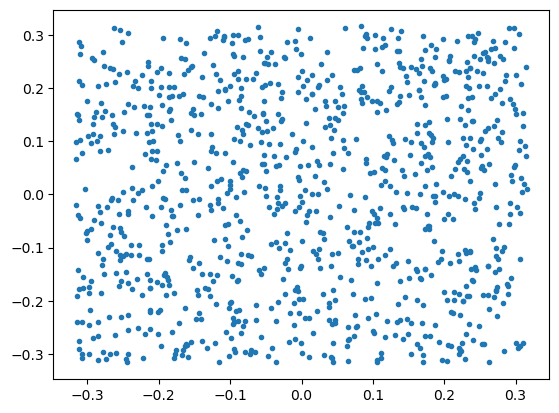

In [8]:
plt.scatter(X[:,0], X[:,1], marker='.')